<h1 align=center><font size = 7>Linear Regression</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning</font></h1>

<div class="alert alert-info" role="alert">
  <h3 class="alert-heading">Links:</h3>
  <a href="https://www.linkedin.com/in/zahraamini-ai/">LinkedIn</a><br>
  <a href="https://github.com/aminizahra">GitHub Repository</a><br>
  <a href="https://zil.ink/zahraamini">Zahra Amini</a>
</div>

# Step0: Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from joblib import dump, load

In [5]:
# pip install seaborn

# Step1: Read Data

In [9]:
df = pd.read_csv('Real estate.csv')

In [11]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [15]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

# Step2: X, y

In [28]:
X = df.drop(['No', 'Y house price of unit area'], axis=1)
y = df['Y house price of unit area']

In [30]:
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [26]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [32]:
X.shape

(414, 6)

In [34]:
y.shape

(414,)

# Step3: Split Trainset and Testset (X_train, X_test, y_train, y_test)
<hr>
<b>from sklearn.model_selection import train_test_split</b>

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
X_train.shape

(331, 6)

In [40]:
X_test.shape

(83, 6)

# Step4: Create the model
<b>linear regression</b>
<hr>
<b>from sklearn.linear_model import LinearRegression</b>

In [42]:
Linear_model = LinearRegression()

# Step5: Training the model

In [44]:
Linear_model.fit(X_train, y_train)

LinearRegression()

In [48]:
X_train.shape

(331, 6)

### Coefficients

In [54]:
cof=Linear_model.coef_

In [58]:
cof

array([ 4.97300395e+00, -2.86733346e-01, -4.39882963e-03,  1.23218477e+00,
        2.43562821e+02,  1.51826711e+00])

In [52]:
X.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [56]:
coef_df = pd.DataFrame(data=cof, index=X.columns, columns=['Coef'])

coef_df

,Coef
X1 transaction date,4.973004
X2 house age,-0.286733
X3 distance to the nearest MRT station,-0.004399
X4 number of convenience stores,1.232185
X5 latitude,243.562821
X6 longitude,1.518267


### intercept

In [50]:
Linear_model.intercept_

-16234.44750938132

# Step6: Predicting Test Data

In [60]:
y_pred = Linear_model.predict(X_test)

In [62]:
y_pred

array([12.30450737,  9.88490574, 21.46053876, 48.47068311, 31.85167611,
       37.67772475, 35.67544056, 40.8217285 , 47.69817127, 40.19604048,
       44.89769944, 32.16128559, 40.35892819, 35.66646715, 44.11329164,
       46.51821124, 38.34972031, 44.36805448, 48.77095665, 45.30967176,
       42.22853532, 54.87710885, 47.93992563, 37.12382093, 33.51000625,
       48.38582917, 40.0972915 , 50.44672718, 47.14080106, 38.7727    ,
       48.09395633, 40.34290285, 45.50207882, 43.93039127, 46.41980069,
        7.80657468, 37.98704031, 40.01484951,  8.16198734, 56.04315554,
       31.38849342, 49.7852694 , 24.32307064, 47.88720366, 40.79589337,
       51.30072269, 41.81427584, 37.41099305, 44.07099624, 35.88473317,
       47.50929893, 34.11635439, 43.48785648, 15.57174637, 38.00697938,
       48.76820672, 44.44589846, 44.75960064, 45.20746963, 40.93276386,
       34.00670322, 44.09769392, 41.91289316, 43.78674027, 53.82385448,
       44.12493759, 23.56587009, 46.96790284, 31.17295742, 40.71

In [64]:
pd.DataFrame({'Y_test':y_test, 'Y_pred':y_pred, 'Residuals':(y_test - y_pred)})

,Y_test,Y_pred,Residuals
176,19.2,12.304507,6.895493
347,11.2,9.884906,1.315094
307,24.7,21.460539,3.239461
299,46.1,48.470683,-2.370683
391,31.3,31.851676,-0.551676
...,...,...,...
65,44.3,43.943787,0.356213
48,13.4,11.670116,1.729884
18,42.3,47.367277,-5.067277
15,50.5,38.112267,12.387733


# Step8: Evalutaing the Model
<hr>
<br>from sklearn import metrics</br>

### MAE

In [ ]:
#Leave the code here!

### MSE

In [66]:
MSE = metrics.mean_squared_error(y_test, y_pred)
MSE

44.12900824091402

### RMSE

In [ ]:
#Leave the code here!

### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [ ]:
#Leave the code here!

In [68]:
test_r = y_test - y_pred

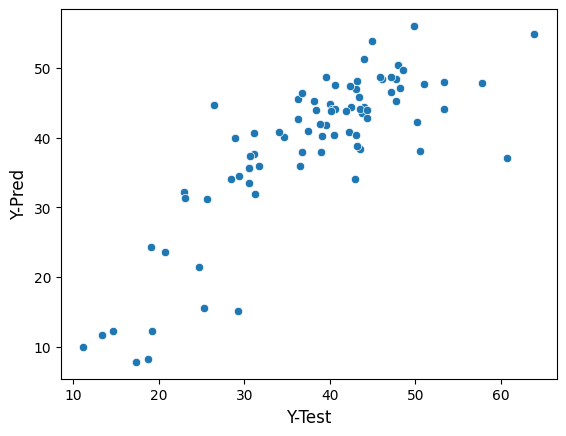

In [70]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test', fontsize=12)
plt.ylabel('Y-Pred', fontsize=12)
plt.show()

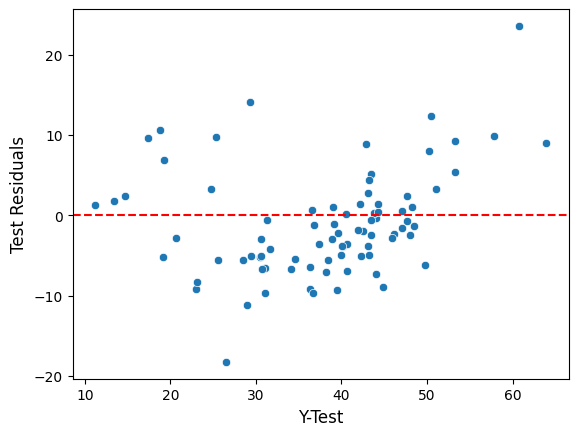

In [72]:
sns.scatterplot(x=y_test, y=test_r)
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Y-Test', fontsize=12)
plt.ylabel('Test Residuals', fontsize=12)
plt.show()

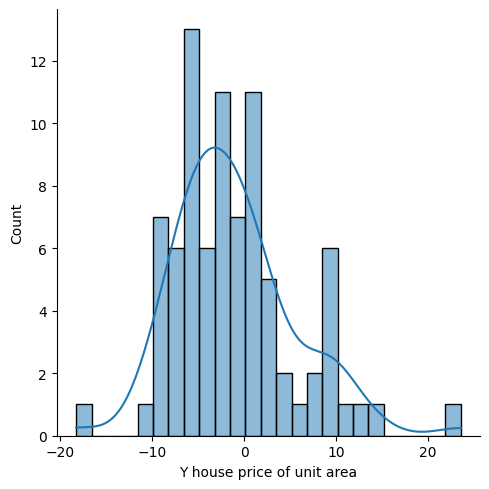

In [86]:
sns.displot(test_r, bins=25, kde=True)

In [74]:
# save

In [76]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [78]:
dump(final_model, 'LR_HP.joblib')

['LR_HP.joblib']

In [80]:
load_model = load('LR_HP.joblib')

In [82]:
test = [[2013.083, 34.8, 405.21340, 1, 24.97349, 121.53372]]

In [84]:
load_model.predict(test)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.57234765])

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!</p>
</div>